In [1]:
# Import Dependencies
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image

from keras.preprocessing import image
from keras.datasets import mnist
from keras import optimizers
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Lambda, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization




In [2]:
# Set up Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change Directory
%cd '/content/drive/MyDrive/balanced_data'

/content/drive/MyDrive/balanced_data


In [4]:
v_happy = "/content/drive/MyDrive/balanced_data/valid/happy"
v_sad = "/content/drive/MyDrive/balanced_data/valid/Sad"
v_angry = "/content/drive/MyDrive/balanced_data/valid/Angry"
v_other = "/content/drive/MyDrive/balanced_data/valid/Other"

In [5]:
tr_happy = "/content/drive/MyDrive/balanced_data/train/happy"
tr_sad = "/content/drive/MyDrive/balanced_data/train/Sad"
tr_angry = "/content/drive/MyDrive/balanced_data/train/Angry"
tr_other = "/content/drive/MyDrive/balanced_data/train/Other"

In [6]:
t_happy = "/content/drive/MyDrive/balanced_data/test/happy"
t_sad = "/content/drive/MyDrive/balanced_data/test/Sad"
t_angry = "/content/drive/MyDrive/balanced_data/test/Angry"
t_other = "/content/drive/MyDrive/balanced_data/test/Other"

In [7]:
# Define the path to the dataset folders
# happy_folder = "/content/drive/MyDrive/Data_analytics /group_project_4/pet_expressions_data/happy"
# sad_folder = "/content/drive/MyDrive/Data_analytics /group_project_4/pet_expressions_data/sad"
# angry_folder = "/content/drive/MyDrive/Data_analytics /group_project_4/pet_expressions_data/angry"
# other_folder = "/content/drive/MyDrive/Data_analytics /group_project_4/pet_expressions_data/other"

In [8]:
# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))  # Resize to a fixed size for the model
            images.append(img)
    return images

In [9]:
# Load images and labels for each emotion
v_happy_images = load_images_from_folder(v_happy)
v_sad_images = load_images_from_folder(v_sad)
v_angry_images = load_images_from_folder(v_angry)
v_other_images = load_images_from_folder(v_other)

In [10]:
tr_happy_images = load_images_from_folder(tr_happy)
tr_sad_images = load_images_from_folder(tr_sad)
tr_angry_images = load_images_from_folder(tr_angry)
tr_other_images = load_images_from_folder(tr_other)

In [11]:
t_happy_images = load_images_from_folder(t_happy)
t_sad_images = load_images_from_folder(t_sad)
t_angry_images = load_images_from_folder(t_angry)
t_other_images = load_images_from_folder(t_other)

In [12]:
# Check shape, 3 means it is in RGB format
v_happy_images[1].shape

(224, 224, 3)

In [13]:
tr_happy_images[1].shape

(224, 224, 3)

In [14]:
t_happy_images[1].shape

(224, 224, 3)

In [15]:
v_happy_labels = [0] * len(v_happy_images)
v_sad_labels = [1] * len(v_sad_images)
v_angry_labels = [2] * len(v_angry_images)
v_other_labels = [3] * len(v_other_images)

In [16]:
tr_happy_labels = [0] * len(tr_happy_images)
tr_sad_labels = [1] * len(tr_sad_images)
tr_angry_labels = [2] * len(tr_angry_images)
tr_other_labels = [3] * len(tr_other_images)

In [17]:
t_happy_labels = [0] * len(t_happy_images)
t_sad_labels = [1] * len(t_sad_images)
t_angry_labels = [2] * len(t_angry_images)
t_other_labels = [3] * len(t_other_images)

In [18]:
# Create labels for each emotion category
# happy_labels = [0] * len(happy_images)
# sad_labels = [1] * len(sad_images)
# angry_labels = [2] * len(angry_images)
# other_labels = [3] * len(other_images) # 3???? not sure if thats correct

In [19]:
x_train = np.array(tr_happy_images + tr_sad_images + tr_angry_images + tr_other_images)
y_train = np.array(tr_happy_labels + tr_sad_labels + tr_angry_labels + tr_other_labels)

In [20]:
x_test = np.array(t_happy_images + t_sad_images + t_angry_images + t_other_images)
y_test = np.array(t_happy_labels + t_sad_labels + t_angry_labels + t_other_labels)

In [21]:
x_validate = np.array(v_happy_images + v_sad_images + v_angry_images + v_other_images)
y_validate = np.array(v_happy_labels + v_sad_labels + v_angry_labels + v_other_labels)

In [22]:
# Concatenate images and labels
# x = np.array(happy_images + sad_images + angry_images + other_images)
# y = np.array(happy_labels + sad_labels + angry_labels + other_labels)

In [23]:
x_train = x_train.astype('float32') / 255.0

In [24]:
x_test = x_test.astype('float32') / 255.0

In [25]:
x_validate = x_validate.astype('float32') / 255.0

In [26]:
# Normalize pixel values to range [0, 1]
# x = x.astype('float32') / 255.0

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, 4)

In [28]:
y_test = tf.keras.utils.to_categorical(y_test, 4)

In [29]:
y_validate = tf.keras.utils.to_categorical(y_validate, 4)

In [30]:
# One-hot encode the labels
# y = tf.keras.utils.to_categorical(y, 4)

In [31]:
# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [32]:
# Split again into a validation set
# x_validate, x_test, y_validate, y_test= train_test_split (x_test,y_test, test_size=.50, random_state=100)

In [33]:
# Reshape the images to (224, 224, 3)
x_train = np.array([cv2.resize(image, (224, 224)) for image in x_train])
x_validate = np.array([cv2.resize(image, (224, 224)) for image in x_validate])

In [34]:
print (f' x train',x_train.shape)
print (f' x test', x_test.shape)
print (f' y train', y_train.shape)
print (f' y test', y_test.shape)
print (f' x validate', x_validate.shape)
print (f' y validate', y_validate.shape)

 x train (1000, 224, 224, 3)
 x test (38, 224, 224, 3)
 y train (1000, 4)
 y test (38, 4)
 x validate (36, 224, 224, 3)
 y validate (36, 4)


In [35]:
#here [3] denotes for RGB images(3 channels)
# Set the paramaters for the vgg16 model
Image_size = [224, 224]
vgg = VGG16(input_shape= Image_size + [3], weights='imagenet', include_top=False)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False

# Set the inputs and outputs for the model
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

#compile according to standard metrics found on the internet
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [36]:
#Fit the model
###################################################################################
# Need to check the size of the validation datasets
# Need to be Make sure that  dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 20 batches)
history = model.fit(
                    x_train, y_train,
                    epochs = 10, verbose=1,
                    validation_data = (x_validate, y_validate),
                    validation_steps = 20)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.5460 - acc: 0.3820 

32/32 [==============================] - 669s 21s/step - loss: 0.5460 - acc: 0.3820 - val_loss: 0.5370 - val_acc: 0.3333
Epoch 2/10
32/32 [==============================] - 637s 20s/step - loss: 0.4813 - acc: 0.5330
Epoch 3/10
32/32 [==============================] - 633s 20s/step - loss: 0.4433 - acc: 0.6330
Epoch 4/10
32/32 [==============================] - 624s 20s/step - loss: 0.4090 - acc: 0.6860
Epoch 5/10
32/32 [==============================] - 628s 20s/step - loss: 0.3812 - acc: 0.7270
Epoch 6/10
32/32 [==============================] - 626s 20s/step - loss: 0.3579 - acc: 0.7650
Epoch 7/10
32/32 [==============================] - 622s 19s/step - loss: 0.3343 - acc: 0.7960
Epoch 8/10
32/32 [==============================] - 626s 20s/step - loss: 0.3174 - acc: 0.8140
Epoch 9/10
32/32 [==============================] - 623s 19s/step - loss: 0.2975 - acc: 0.8480
Epoch 10/10
32/32 [==============================] - 623s 19s/step - loss: 0.2791 - acc: 0.8800


In [37]:
# Evaluate the model on the train data
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=2)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

32/32 - 630s - loss: 0.2643 - acc: 0.8790 - 630s/epoch - 20s/step
Train Accuracy: 0.8790000081062317
2/2 - 25s - loss: 0.5330 - acc: 0.5263 - 25s/epoch - 12s/step
Test Accuracy: 0.5263158082962036


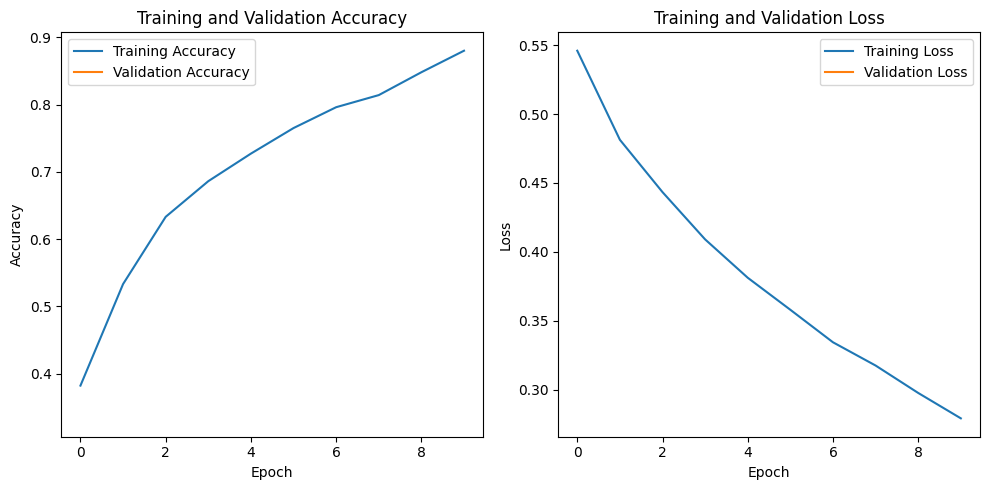

In [38]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Save the trained model
model.save("pet_expressions_model_vgg16.h5")

In [40]:
##################################################################################

In [41]:
# Load the saved model

loaded_model = load_model("pet_expressions_model.h5")

In [42]:
# Function to load and preprocess images

#def load_images_from_folder(folder):
 #   images = []
  #  for filename in os.listdir(folder):
   #     img = cv2.imread(os.path.join(folder, filename))
    #    if img is not None:
     #       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #      img = cv2.resize(img, (224, 224))  # Resize to a fixed size for the model
       #     images.append(img)
  #  return images

In [46]:
# Load a custom test image

#custom_test_image_path = "/content/drive/MyDrive/Pictures/"

#custom_test_image = cv2.imread(custom_test_image_path)
#custom_test_image = cv2.cvtColor(custom_test_image, cv2.COLOR_BGR2GRAY)
#custom_test_image = cv2.resize(custom_test_image, (224, 224))
#custom_test_image = custom_test_image.astype('float32') / 255.0

In [47]:
#dinky = load_images_from_folder(custom_test_image_path)

In [50]:
# Reshape the image to match the model input shape

#dinky = np.expand_dims(dinky, axis=0)
#dinky = np.expand_dims(dinky, axis=-1)

In [52]:
# Make predictions on the custom test image

#prediction = loaded_model.predict(dinky)
#prediction_prob = prediction[0]

In [ ]:
#emotion_label = np.argmax(prediction[0])

In [ ]:
# Map the predicted label to emotion class

#emotion_classes = {0: 'happy', 1: 'sad', 2: 'angry'}
#predicted_emotion = emotion_classes[emotion_label]

In [ ]:
# Print the custom test image and its predicted label

#print(f"Predicted Emotion: {predicted_emotion}")
#print(f"Confidence [happy, sad, angry]: {prediction_prob}")

In [ ]:
#Display the custom test image using matplotlib

#plt.imshow(custom_test_image[0, :, :, 0])
#plt.title(f"Predicted Emotion: {predicted_emotion}")
#plt.axis('off')  # Hide axes
#plt.show()

In [ ]:
# Display the original custom test image using PIL

#img_pil = Image.open(custom_test_image_path)
#plt.imshow(np.array(img_pil))
#plt.title(f"Predicted Emotion: {predicted_emotion}")
#plt.axis('off')  # Hide axes
#plt.show()